# California House pricing prediction

Le but de ce notebook sera de tester des algorithmes de machinelearning afin de prédire les prix de l'immobilier en Californie pour l'entreprise DataLes.
Pour cela nous avons des data récupéré en 1990.

## Sommaire

- récupération des données
- exploration des données
- traitement des données
- machine learning
- conclusion

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xbg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

### Récupération des données

In [2]:
df = pd.read_csv("src/housing.csv")

### Exploration des données

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isna().mean()

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

<AxesSubplot:>

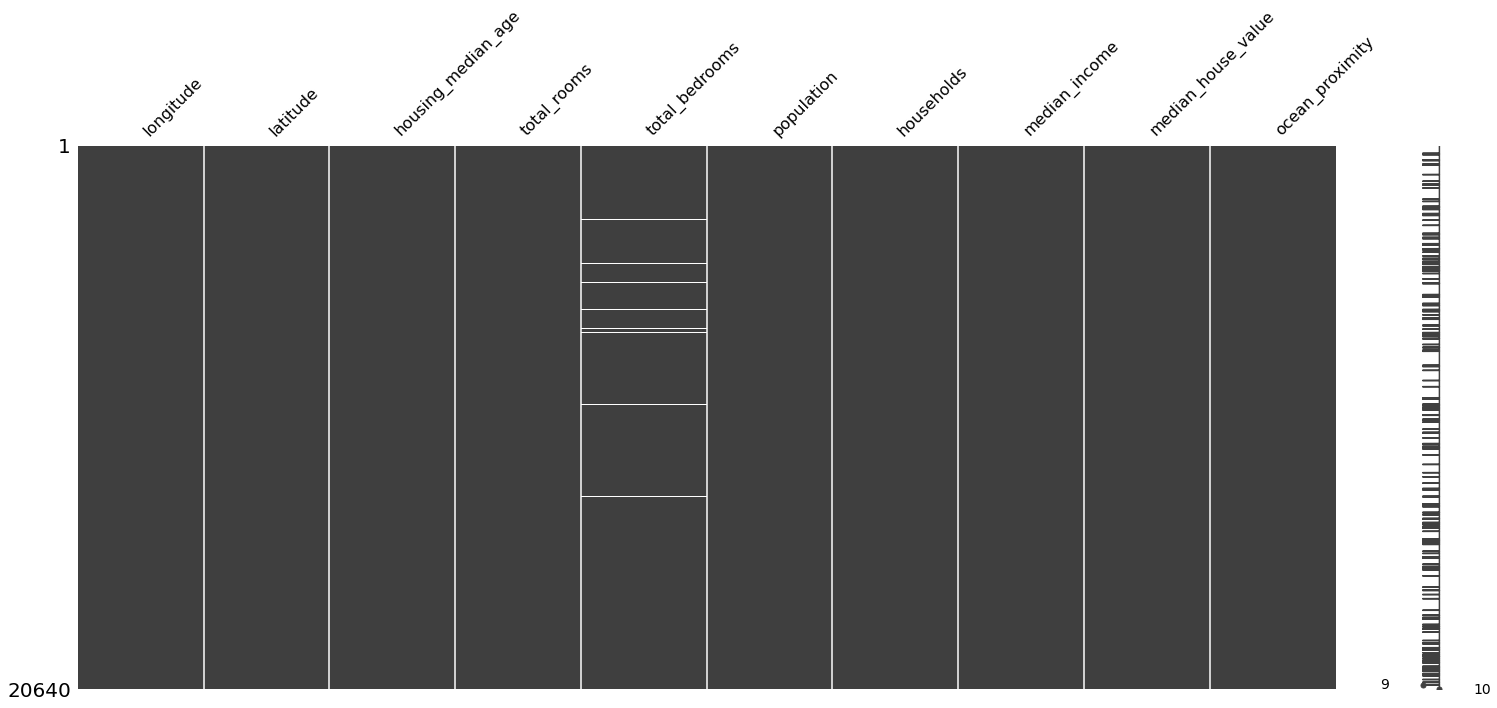

In [7]:
msno.matrix(df)

### Replacing missing values

In [8]:
df.total_bedrooms.fillna(method='pad', inplace=True)

<AxesSubplot:>

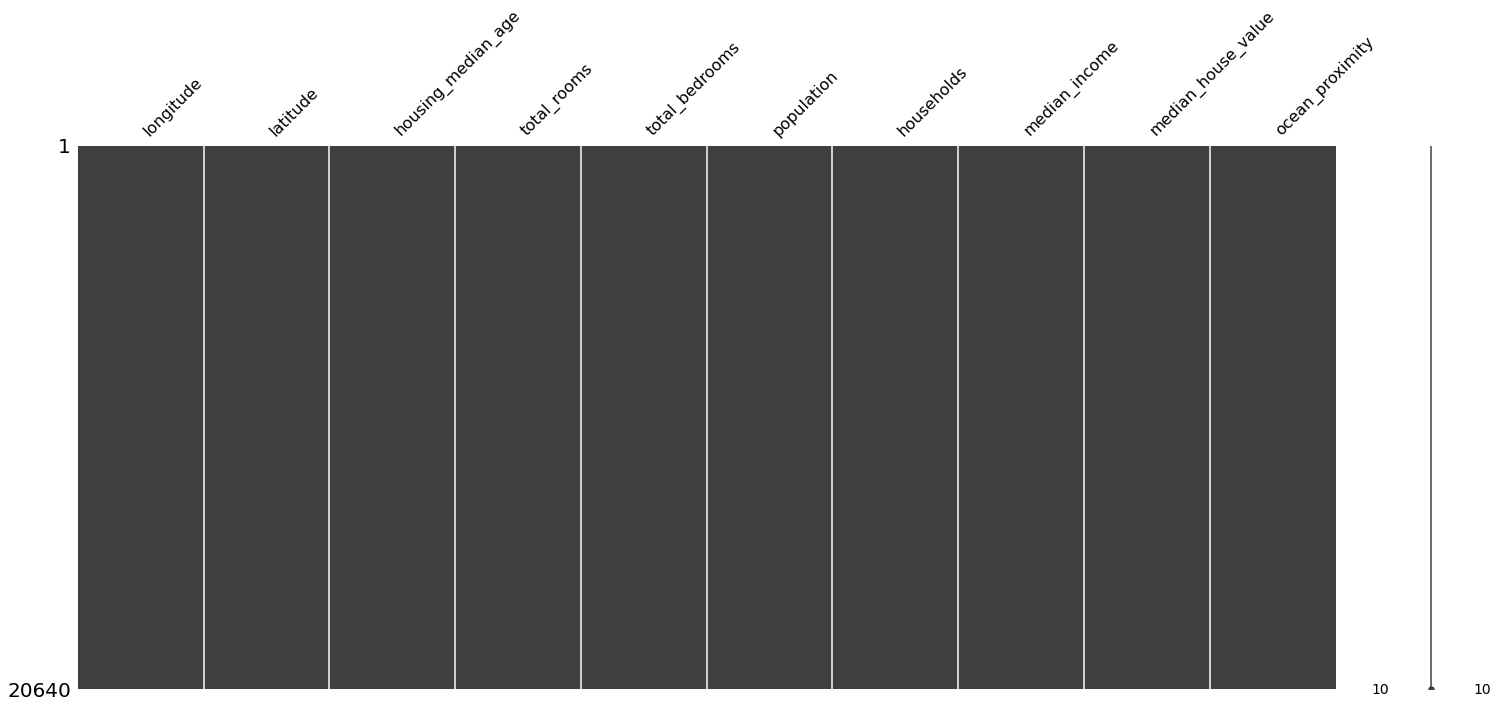

In [9]:
msno.matrix(df)

### Encoding data

In [10]:
label = LabelEncoder()

df['ocean_proximity'] = label.fit_transform(df['ocean_proximity'])
label.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


### Correlation Matrix

<AxesSubplot:>

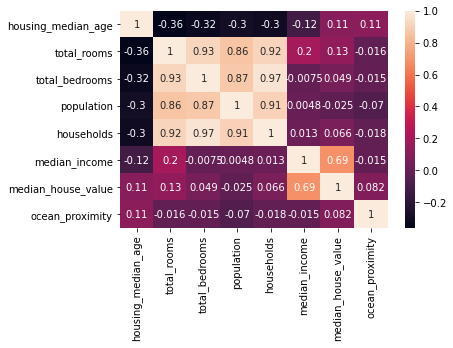

In [12]:
corr = df.iloc[:,2:].corr()
sns.heatmap(corr, annot=True)

### Models

In [13]:
X = np.array(df.drop(columns=['median_house_value']))
y = np.array(df['median_house_value'])

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

#### Random Forest

In [16]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
y_pred = rf_model.predict(X_test)

In [18]:
mean_squared_error(y_test, y_pred)

2441506257.4111915

In [19]:
mean_absolute_error(y_test, y_pred)

32183.967094961237

In [20]:
r2_score(y_test, y_pred)

0.8174302810088803

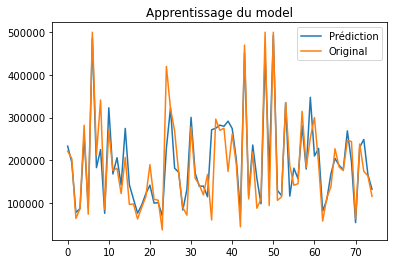

In [21]:
plt.title('Apprentissage du model')
plt.plot(list(y_pred)[:75], label='Prédiction')
plt.plot(list(y_test)[:75], label='Original')
plt.legend()

#### KNeighbors

In [22]:
kn_model = KNeighborsRegressor()
kn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [23]:
y_pred = kn_model.predict(X_test)

In [24]:
mean_squared_error(y_test, y_pred)

3734617210.7713027

In [25]:
mean_absolute_error(y_test, y_pred)

40764.18914728682

In [26]:
r2_score(y_test, y_pred)

0.7207346847298763

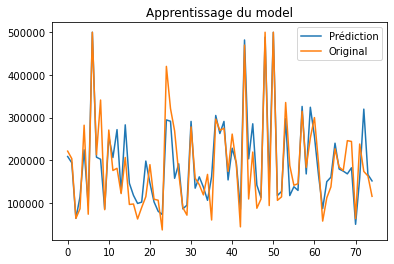

In [27]:
plt.title('Apprentissage du model')
plt.plot(list(y_pred)[:75], label='Prédiction')
plt.plot(list(y_test)[:75], label='Original')
plt.legend()

#### XGBoost

In [28]:
xgb_model = xbg.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
y_pred = xgb_model.predict(X_test)

In [30]:
mean_squared_error(y_test, y_pred)

2327793031.0964293

In [31]:
mean_absolute_error(y_test, y_pred)

31832.472168725777

In [32]:
r2_score(y_test, y_pred)

0.8259334710829753

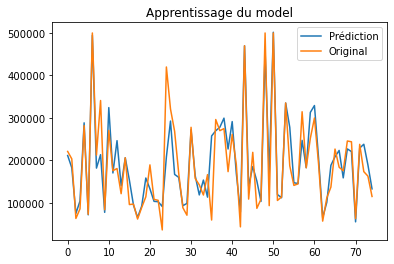

In [33]:
plt.title('Apprentissage du model')
plt.plot(list(y_pred)[:75], label='Prédiction')
plt.plot(list(y_test)[:75], label='Original')
plt.legend()

### Conclusion

On peut voir avec ces 3 models que le XGBoost est le plus performant et donc celui qui sera déployé

### Enregistrement du model

In [34]:
joblib.dump(xgb_model, 'xgb_model.pkl') 

['xgb_model.pkl']